simple linear model

In [1]:
#time discretization
T = 2.0
dt = 0.25
timesteps = Int(T/dt)
#initial values
N = 2
a = 5
c0 = [0.9,0.1]
#production terms
function p(n,i,j,c)
    if i == j 
        return 0
    elseif i == 1
        return c[n,2]
    elseif j == 1
        return a*c[n,1]
    end
end
#destruction terms
function d(n,j,i,c)
    if i == j 
        return 0
    elseif i == 1
        return c[n,2]
    elseif j == 1
        return a*c[n,1]
    end
end


p(n,i,j,c,c_1) = 0.5*(p(n,i,j,c).+p(n,i,j,c_1))
d(n,i,j,c,c_1) = 0.5*(d(n,i,j,c).+d(n,i,j,c_1))


d (generic function with 2 methods)

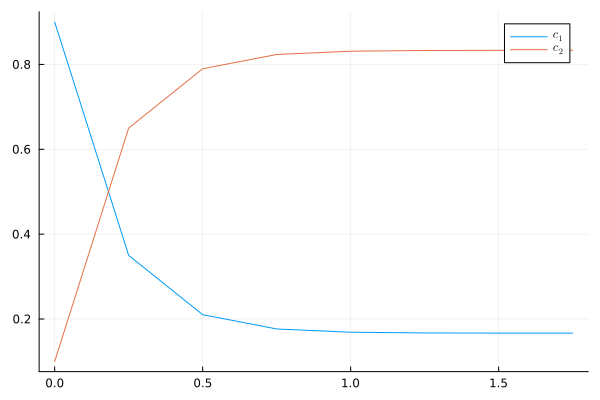

In [3]:
include("./disc.jl")
import .disc

using Plots
using LaTeXStrings

c = disc.MP_Heun(dt,T,N,p,d,c0)
time = collect(0:dt:(T-dt))
plot(time,c[:,1],label=L"c_1")
plot!(time,c[:,2],label=L"c_2")